In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass0_minority_train.csv',index=False)
df_min=pd.read_csv('glass0_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass0_majority_train.csv',index=False)
df_majority=pd.read_csv('glass0_majority_train.csv')

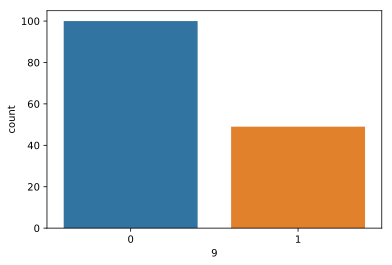

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(43, 5, 10)
(43, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
25/25 [==============================] - 6s 232ms/step - loss: 0.1875
Epoch 2/500
25/25 [==============================] - 0s 682us/step - loss: 0.1822
Epoch 3/500
25/25 [==============================] - 0s 842us/step - loss: 0.1762
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 5/500
25/25 [==============================] - 0s 885us/step - loss: 0.1641
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1581
Epoch 7/500
25/25 [==============================] - 0s 922us/step - loss: 0.1523
Epoch 8/500
25/25 [==============================] - 0s 822us/step - loss: 0.1466
Epoch 9/500
25/25 [==============================] - 0s 922us/step - loss: 0.1410
Epoch 10/500
25/25 [==============================] - 0s 822us/step - loss: 0.1355
Epoch 11/500
25/25 [==============================] - 0s 963us/step - loss: 0.1302
Epoch 12/500
25/25 [==============================] - 0s 902us/step - loss: 0.1250
Epoch 13/500
25/2

Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 102/500
25/25 [==============================] - 0s 762us/step - loss: 0.0337
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 104/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 106/500
25/25 [==============================] - 0s 862us/step - loss: 0.0336
Epoch 107/500
25/25 [==============================] - 0s 983us/step - loss: 0.0335
Epoch 108/500
25/25 [==============================] - 0s 862us/step - loss: 0.0335
Epoch 109/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 110/500
25/25 [==============================] - 0s 842us/step - loss: 0.0335
Epoch 111/500
25/25 [==============================] - 0s 802us/step - loss: 0.0334
Epoch 112/500
25/25 [==============================] - 0s 902us/step - loss: 0.0334
Ep

Epoch 200/500
25/25 [==============================] - 0s 862us/step - loss: 0.0309
Epoch 201/500
25/25 [==============================] - 0s 942us/step - loss: 0.0308
Epoch 202/500
25/25 [==============================] - 0s 802us/step - loss: 0.0308
Epoch 203/500
25/25 [==============================] - 0s 922us/step - loss: 0.0307
Epoch 204/500
25/25 [==============================] - 0s 963us/step - loss: 0.0307
Epoch 205/500
25/25 [==============================] - 0s 922us/step - loss: 0.0307
Epoch 206/500
25/25 [==============================] - 0s 862us/step - loss: 0.0306
Epoch 207/500
25/25 [==============================] - 0s 822us/step - loss: 0.0306
Epoch 208/500
25/25 [==============================] - 0s 862us/step - loss: 0.0305
Epoch 209/500
25/25 [==============================] - 0s 802us/step - loss: 0.0305
Epoch 210/500
25/25 [==============================] - 0s 943us/step - loss: 0.0304
Epoch 211/500
25/25 [==============================] - 0s 882us/step - loss:

Epoch 298/500
25/25 [==============================] - 0s 642us/step - loss: 0.0226
Epoch 299/500
25/25 [==============================] - 0s 762us/step - loss: 0.0225
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 301/500
25/25 [==============================] - 0s 882us/step - loss: 0.0223
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 303/500
25/25 [==============================] - 0s 983us/step - loss: 0.0221
Epoch 304/500
25/25 [==============================] - 0s 842us/step - loss: 0.0220
Epoch 305/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 306/500
25/25 [==============================] - 0s 682us/step - loss: 0.0217
Epoch 307/500
25/25 [==============================] - 0s 782us/step - loss: 0.0216
Epoch 308/500
25/25 [==============================] - 0s 962us/step - loss: 0.0215
Epoch 309/500
25/25 [==============================] - 0s 862us/step - loss: 0.021

Epoch 396/500
25/25 [==============================] - 0s 822us/step - loss: 0.0141
Epoch 397/500
25/25 [==============================] - 0s 862us/step - loss: 0.0140
Epoch 398/500
25/25 [==============================] - 0s 962us/step - loss: 0.0140
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 400/500
25/25 [==============================] - 0s 943us/step - loss: 0.0139
Epoch 401/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 404/500
25/25 [==============================] - 0s 902us/step - loss: 0.0136
Epoch 405/500
25/25 [==============================] - 0s 983us/step - loss: 0.0136
Epoch 406/500
25/25 [==============================] - 0s 862us/step - loss: 0.0135
Epoch 407/500
25/25 [==============================] - 0s 982us/step - loss: 0.0135


25/25 [==============================] - 0s 722us/step - loss: 0.0098
Epoch 495/500
25/25 [==============================] - 0s 902us/step - loss: 0.0098
Epoch 496/500
25/25 [==============================] - 0s 982us/step - loss: 0.0098
Epoch 497/500
25/25 [==============================] - 0s 802us/step - loss: 0.0098
Epoch 498/500
25/25 [==============================] - 0s 903us/step - loss: 0.0097
Epoch 499/500
25/25 [==============================] - 0s 902us/step - loss: 0.0097
Epoch 500/500
25/25 [==============================] - 0s 862us/step - loss: 0.0097


In [14]:
model.save('glass0.h5')

In [15]:
Xtrain.shape

(25, 5, 10)

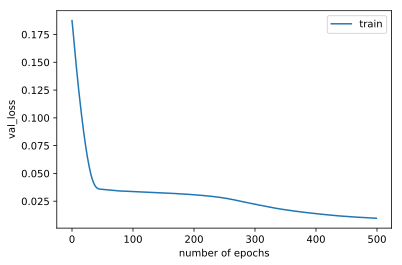

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

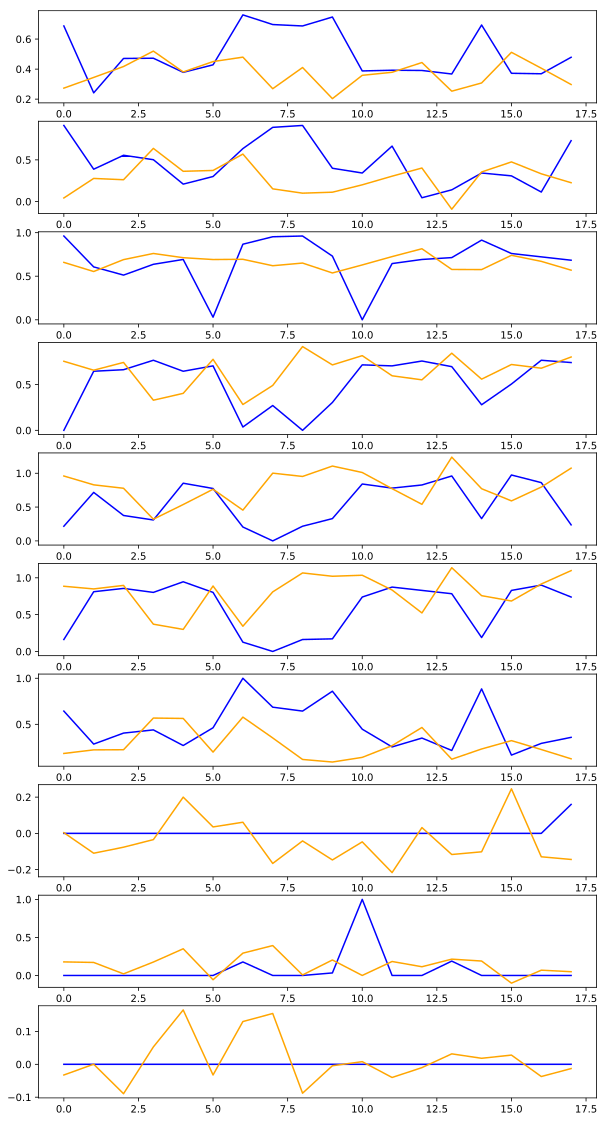

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.73106068e-01,  4.30214144e-02,  6.58852279e-01,
         7.54161119e-01,  9.59216774e-01,  8.85185778e-01,
         1.83533296e-01,  3.88846919e-03,  1.78353846e-01,
        -3.24917324e-02],
       [ 3.44455004e-01,  2.77256697e-01,  5.54031670e-01,
         6.56734526e-01,  8.28556836e-01,  8.48983645e-01,
         2.22366467e-01, -1.09498024e-01,  1.71115249e-01,
         2.83230096e-04],
       [ 4.17166531e-01,  2.61707842e-01,  6.90542459e-01,
         7.41545081e-01,  7.78066099e-01,  8.96779597e-01,
         2.23958030e-01, -7.61973858e-02,  2.10501514e-02,
        -8.94279480e-02],
       [ 5.19960225e-01,  6.37485266e-01,  7.61126459e-01,
         3.29126865e-01,  3.20864975e-01,  3.70453715e-01,
         5.67823112e-01, -3.44265737e-02,  1.76479220e-01,
         5.28609231e-02],
       [ 3.81083906e-01,  3.62864673e-01,  7.12681711e-01,
         4.03878331e-01,  5.37439048e-01,  2.99458236e-01,
         5.63730717e-01,  1.99992299e-01,  3.50917429e-01,
         1.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

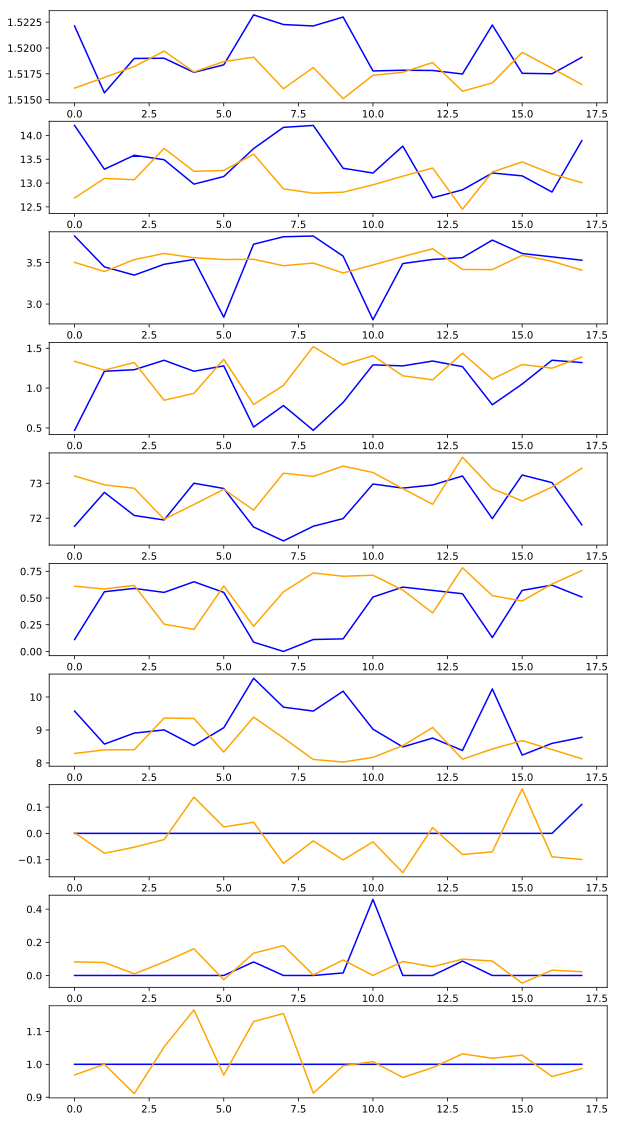

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.73106068e-01,  4.30214144e-02,  6.58852279e-01,
         7.54161119e-01,  9.59216774e-01,  8.85185778e-01,
         1.83533296e-01,  3.88846919e-03,  1.78353846e-01,
        -3.24917324e-02],
       [ 3.44455004e-01,  2.77256697e-01,  5.54031670e-01,
         6.56734526e-01,  8.28556836e-01,  8.48983645e-01,
         2.22366467e-01, -1.09498024e-01,  1.71115249e-01,
         2.83230096e-04],
       [ 4.17166531e-01,  2.61707842e-01,  6.90542459e-01,
         7.41545081e-01,  7.78066099e-01,  8.96779597e-01,
         2.23958030e-01, -7.61973858e-02,  2.10501514e-02,
        -8.94279480e-02],
       [ 5.19960225e-01,  6.37485266e-01,  7.61126459e-01,
         3.29126865e-01,  3.20864975e-01,  3.70453715e-01,
         5.67823112e-01, -3.44265737e-02,  1.76479220e-01,
         5.28609231e-02],
       [ 3.81083906e-01,  3.62864673e-01,  7.12681711e-01,
         4.03878331e-01,  5.37439048e-01,  2.99458236e-01,
         5.63730717e-01,  1.99992299e-01,  3.50917429e-01,
         1.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)